In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [8]:
load_factors = [0.5, 1.0, 2.0]
filename_path = r"C:\Users\joses\Mi unidad\TRABAJO\48_FG_protection\TRABAJO\fgp_optimizer\optimization_simple_plastic"


X_baseline = {load_factor: None for load_factor in load_factors}
y_baseline = {load_factor: None for load_factor in load_factors}
for load_factor in load_factors:
    filename = filename_path + r'\dataset_baseline'
    if load_factor == 0.5:
        filename += '_half'
    elif load_factor == 1.0:
        pass
    elif load_factor == 2.0:
        filename += '_double'
    else:
        raise ValueError
    filename += '.pkl'


    with open(filename, 'rb') as f:
        dataset_baseline = pickle.load(file=f)

    X_baseline[load_factor] = np.array(dataset_baseline[1])
    y_baseline[load_factor] = np.array(dataset_baseline[2])
    print('baseline', X_baseline, y_baseline)

baseline {0.5: array([[0, 0, 0, 0, 0, 0]]), 1.0: None, 2.0: None} {0.5: array([0.00499192]), 1.0: None, 2.0: None}
baseline {0.5: array([[0, 0, 0, 0, 0, 0]]), 1.0: array([[0, 0, 0, 0, 0, 0]]), 2.0: None} {0.5: array([0.00499192]), 1.0: array([0.00998437]), 2.0: None}
baseline {0.5: array([[0, 0, 0, 0, 0, 0]]), 1.0: array([[0, 0, 0, 0, 0, 0]]), 2.0: array([[0, 0, 0, 0, 0, 0]])} {0.5: array([0.00499192]), 1.0: array([0.00998437]), 2.0: array([0.0199712])}


In [9]:
y_baseline[load_factor]

array([0.0199712])

Text(0, 0.5, 'peak_response (m)')

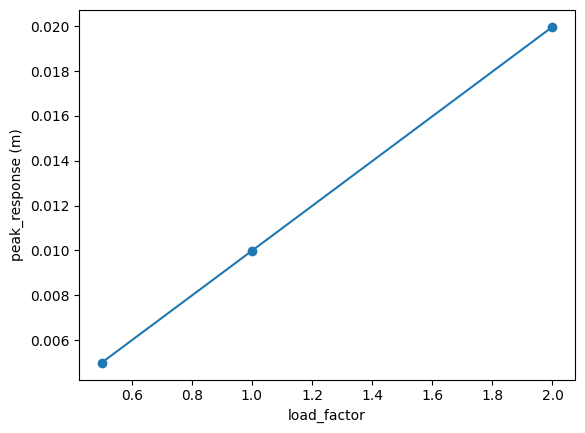

In [10]:
plt.plot(load_factors, [y_baseline[load_factor] for load_factor in load_factors], marker='o')
plt.xlabel('load_factor')
plt.ylabel('peak_response (m)')

In [11]:
m_adds = [10, 20, 30]


X = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}
y = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}
for load_factor in load_factors:
    for m_add in m_adds:
        filename = filename_path + f'\dataset_dense_madd{int(m_add)}'
        if load_factor == 0.5:
            filename += '_half'
        elif load_factor == 1.0:
            pass
        elif load_factor == 2.0:
            filename += '_double'
        else:
            raise ValueError
        filename += '.pkl'

        with open(filename, 'rb') as f:
            dataset = pickle.load(file=f)

        X[load_factor][m_add] = np.array(dataset[1])
        y[load_factor][m_add] = np.array(dataset[2]).reshape((-1, 1))

### Number of combinations

In [12]:
import itertools


m_steps = 5
m_options = [i*m_add/(m_steps-1) for i in range(m_steps)]
m123 = [(_[0], _[1], m_add-(sum(_))) for _ in list(itertools.product(m_options, m_options))
        if min([_[0], _[1], m_add-(sum(_))]) >= 0.]
for _ in m123:
    print(tuple(np.array(_)/m_add))

(0.0, 0.0, 1.0)
(0.0, 0.25, 0.75)
(0.0, 0.5, 0.5)
(0.0, 0.75, 0.25)
(0.0, 1.0, 0.0)
(0.25, 0.0, 0.75)
(0.25, 0.25, 0.5)
(0.25, 0.5, 0.25)
(0.25, 0.75, 0.0)
(0.5, 0.0, 0.5)
(0.5, 0.25, 0.25)
(0.5, 0.5, 0.0)
(0.75, 0.0, 0.25)
(0.75, 0.25, 0.0)
(1.0, 0.0, 0.0)


In [13]:
(57.6 * 2 / np.pi) * (2 * np.pi * 120) ** 2

20846100.88474814

In [14]:
57.6 * 2 / np.pi

36.66929888837269

In [15]:
print(len(X[0.5][10]))
print((15) * (6**3))

3240
3240


In [16]:
optimum_parameters = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}
optimum_performance = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}


for load_factor in load_factors:
    print('*** load_factor: ', load_factor, '***')
    for m_add in m_adds:
        print('* m_add: ', m_add, '*')
        i_opt = np.argmin(y[load_factor][m_add])
        optimum_parameters[load_factor][m_add] = X[load_factor][m_add][i_opt]
        optimum_performance[load_factor][m_add] = y[load_factor][m_add][i_opt]/y_baseline[load_factor]
        print(optimum_parameters[load_factor][m_add], optimum_performance[load_factor][m_add])

with open('optimum_brute_force.pkl', 'wb') as file:
    pickle.dump((optimum_parameters, optimum_performance), file=file)

*** load_factor:  0.5 ***
* m_add:  10 *
[0.00e+00 0.00e+00 1.00e+01 2.52e+04 2.52e+04 2.52e+04] [0.59400739]
* m_add:  20 *
[0.00e+00 0.00e+00 2.00e+01 1.26e+04 1.26e+04 2.52e+04] [0.40831269]
* m_add:  30 *
[    0.     0.    30. 12600. 12600. 12600.] [0.3045245]
*** load_factor:  1.0 ***
* m_add:  10 *
[0.0e+00 0.0e+00 1.0e+01 6.3e+04 6.3e+04 6.3e+04] [0.86324209]
* m_add:  20 *
[0.00e+00 0.00e+00 2.00e+01 5.04e+04 5.04e+04 5.04e+04] [0.52968153]
* m_add:  30 *
[0.00e+00 0.00e+00 3.00e+01 3.78e+04 5.04e+04 3.78e+04] [0.41007389]
*** load_factor:  2.0 ***
* m_add:  10 *
[1.0e+01 0.0e+00 0.0e+00 6.3e+04 0.0e+00 6.3e+04] [1.06570379]
* m_add:  20 *
[2.00e+01 0.00e+00 0.00e+00 6.30e+04 2.52e+04 1.26e+04] [1.06531817]
* m_add:  30 *
[0.0e+00 0.0e+00 3.0e+01 6.3e+04 6.3e+04 6.3e+04] [0.83449721]


<Figure size 640x480 with 0 Axes>

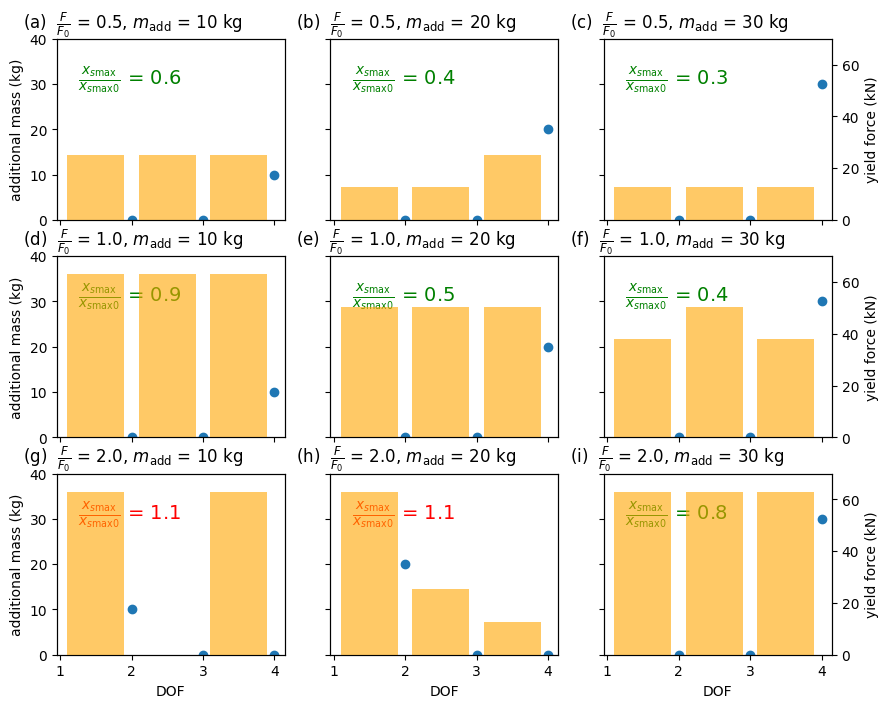

In [35]:
plt.tight_layout()
fig, ax = plt.subplots(3,3, figsize=(10,8), sharey='row', sharex='col')
axt = ax.__copy__()

for i, load_factor in enumerate(load_factors):
    for j, m_add in enumerate(m_adds):
        i_opt = np.argmin(y[load_factor][m_add])
        optimum_parameters[load_factor][m_add] = X[load_factor][m_add][i_opt]
        optimum_performance[load_factor][m_add] = y[load_factor][m_add][i_opt]/y_baseline[load_factor]
        ax[i, j].set_title(fr'({chr(ord("a") + i*3 + j)})  '
                           fr'$\frac{{F}}{{F_0}}$ = {load_factor}, $m_\mathrm{{add}}$ = {m_add} kg',
                           loc='left', x=-.15)
        perf = np.round(optimum_performance[load_factor][m_add][0], 1)
        if j == 0:
            ax[i, j].set_ylabel('additional mass (kg)')
        ax[i, j].plot(np.array(range(3))+2.,
                      optimum_parameters[load_factor][m_add][:3], marker='o', 
                      linestyle='none', label='additional mass')
        ax[i, j].set_ylim([0,40])

        axt[i, j] = ax[i, j].twinx()
        axt[i, j].bar(np.array(range(len(optimum_parameters[load_factor][m_add][3:])))+1.5, 
                      optimum_parameters[load_factor][m_add][3:]*1e-3, 
                      color='orange', alpha=0.6, label='yield force')
        
        ax[i, j].text(1.25, 30, 
                      r'$\frac{x_{s\mathrm{{max}}}}{x_{{s\mathrm{{max}}0}}}$ = ' + f'{perf}',
                      color='red' if perf >= 1 else 'green',
                      size=14)       
          
        axt[i, j].set_ylim([0,70])
        if j < 2:
            axt[i, j].set_yticks([], [])
        else:
            axt[i, j].set_ylabel('yield force (kN)')
        if i == 2:
            ax[i, j].set_xlabel('DOF')

plt.show()
fig.savefig('parametric_opt.pdf', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

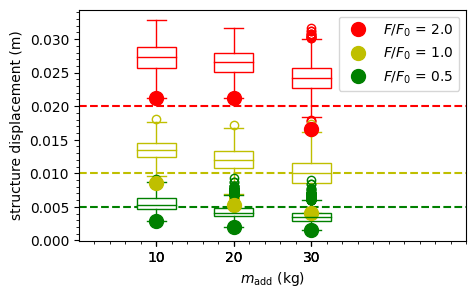

In [18]:

plt.tight_layout()
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.minorticks_on()
colors = ['r', 'y', 'g']
for color, load_factor in zip(colors, load_factors[::-1]):
    ax.hlines(y_baseline[load_factor], xmin=0, xmax=50, colors=color, linestyle='--')
    for m_add in m_adds:
        box = ax.boxplot(y[load_factor][m_add], positions=[m_add], widths=5, patch_artist=True, 
                         medianprops=dict(color=color), 
                         whiskerprops=dict(color=color), 
                         capprops=dict(color=color), 
                         boxprops=dict(color=color), 
                         flierprops=dict(color=color, 
                                         markeredgecolor=color))
        for patch in box['boxes']: 
            patch.set_facecolor('w')
for color, load_factor in zip(colors, load_factors[::-1]):
    ax.plot(m_adds, [optimum_performance[load_factor][m_add]*y_baseline[load_factor] for m_add in m_adds],
             label=f'$F/F_0$ = {load_factor}', marker='o', markersize=10, linestyle='none', color=color)
ax.legend(loc='upper right')
ax.set_xlabel('$m_\mathrm{add}$ (kg)')
ax.set_ylabel('structure displacement (m)')
ax.set_xlim((0,50))
fig.savefig('parametric_results.pdf', bbox_inches='tight')

## Analytically optimized - numerically evaluated

In [19]:
m_adds = [10, 20, 30]


X_optimized = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}
y_optimized = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}
for load_factor in load_factors:
    for m_add in m_adds:
        filename = filename_path + f'\dataset_optimized_madd{int(m_add)}'
        if load_factor == 0.5:
            filename += '_half'
        elif load_factor == 1.0:
            pass
        elif load_factor == 2.0:
            filename += '_double'
        else:
            raise ValueError
        filename += '.pkl'

        with open(filename, 'rb') as f:
            dataset_optimized = pickle.load(file=f)

        X_optimized[load_factor][m_add] = np.array(dataset_optimized[1])
        y_optimized[load_factor][m_add] = np.array(dataset_optimized[2]).reshape((-1, 1))

In [20]:
optimized_parameters = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}
optimized_performance = {load_factor: {m_add: None for m_add in m_adds} for load_factor in load_factors}


for load_factor in load_factors:
    print('*** load_factor: ', load_factor, '***')
    for m_add in m_adds:
        print('* m_add: ', m_add, '*')
        i_opt = np.argmin(y_optimized[load_factor][m_add])
        optimized_parameters[load_factor][m_add] = X_optimized[load_factor][m_add][i_opt]
        optimized_performance[load_factor][m_add] = y_optimized[load_factor][m_add][i_opt]/y_baseline[load_factor]
        print(optimized_parameters[load_factor][m_add], optimized_performance[load_factor][m_add])

with open('optimized.pkl', 'wb') as file:
    pickle.dump((optimized_parameters, optimized_performance), file=file)

*** load_factor:  0.5 ***
* m_add:  10 *
[0.0000e+00 0.0000e+00 1.0000e+01 3.2695e+04 3.2695e+04 3.2695e+04] [0.70701348]
* m_add:  20 *
[0.0000e+00 0.0000e+00 2.0000e+01 2.3137e+04 2.3137e+04 2.3137e+04] [0.49305992]
* m_add:  30 *
[    0.     0.    30. 17335. 17335. 17335.] [0.36345727]
*** load_factor:  1.0 ***
* m_add:  10 *
[0.000e+00 0.000e+00 1.000e+01 8.064e+04 8.064e+04 8.064e+04] [0.81471114]
* m_add:  20 *
[0.0000e+00 0.0000e+00 2.0000e+01 6.4099e+04 6.4099e+04 6.4099e+04] [0.63485377]
* m_add:  30 *
[0.0000e+00 0.0000e+00 3.0000e+01 5.4258e+04 5.4258e+04 5.4258e+04] [0.51937576]
*** load_factor:  2.0 ***
* m_add:  10 *
[0.00000e+00 0.00000e+00 1.00000e+01 1.82936e+05 1.82936e+05 1.82936e+05] [0.89208498]
* m_add:  20 *
[0.00000e+00 0.00000e+00 2.00000e+01 1.53351e+05 1.53351e+05 1.53351e+05] [0.74339028]
* m_add:  30 *
[0.00000e+00 0.00000e+00 3.00000e+01 1.36259e+05 1.36259e+05 1.36259e+05] [0.64270147]


(0.0, 1.1)

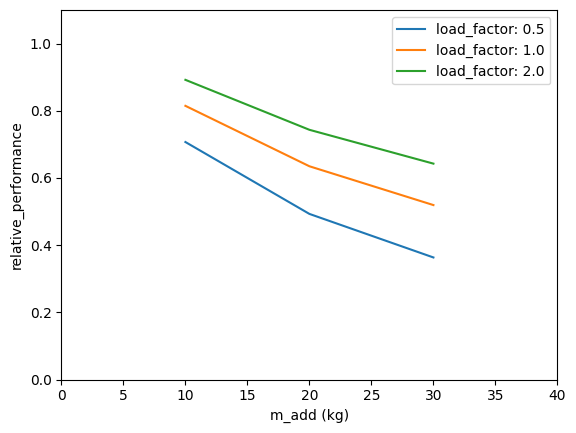

In [21]:
for load_factor in load_factors:
    plt.plot(m_adds, [optimized_performance[load_factor][m_add] for m_add in m_adds],
             label=f'load_factor: {load_factor}')
plt.legend()
plt.xlabel('m_add (kg)')
plt.ylabel('relative_performance')
plt.xlim((0,40))
plt.ylim((0,1.1))

# Buckingham Pi

In [22]:
import numpy as np
from sympy import Matrix


# Matriz de exponente
exponent_matrix = np.array([
    [0, 1, 0],  # d_c (m)
    [1, 0, 0],  # m_a (kg)
    [1, 1, -2], # F (N)
    [1, 0, -2], # k_s (N/m)
    [1, 0, 0],  # m_s (kg)
    [1, 1, -2], # f (N)
    [0, 0, 1],  # T (s)
    [0, 1, 0],  # r (m)
])

# Convertir la matriz a una matriz de sympy para cálculo del rango
rank = Matrix(exponent_matrix).rank()
n = exponent_matrix.shape[0]  # Número de variables

# Determinar el número de grupos adimensionales (π)
pi_groups = n - rank

print(f"Número de grupos adimensionales (π): {pi_groups}")

Número de grupos adimensionales (π): 5


$\Pi_i = d_c^a \cdot m_a^b \cdot F^c \cdot k_s^d \cdot m_s^e \cdot f^f \cdot T^g \cdot r^h$

In [23]:
import numpy as np
from scipy.linalg import null_space 


# Given exponent matrix
print(exponent_matrix)

# Base variables: d_c, m_s, k_s
base_vars_indices = [0, 4, 3]

# Extract the submatrix for the base variables
base_matrix = exponent_matrix[base_vars_indices, :]
print(base_matrix)


[[ 0  1  0]
 [ 1  0  0]
 [ 1  1 -2]
 [ 1  0 -2]
 [ 1  0  0]
 [ 1  1 -2]
 [ 0  0  1]
 [ 0  1  0]]
[[ 0  1  0]
 [ 1  0  0]
 [ 1  0 -2]]


# Buckinham py

In [24]:
from bpi import BuckinghamPi

In [25]:
Example = BuckinghamPi()
Example.add_variable(name='d_c', dimensions='L', non_repeating=True)
Example.add_variable(name='m_a', dimensions='M')
Example.add_variable(name='F', dimensions='M*L/(T^2)')
Example.add_variable(name='k_s', dimensions='M/(T^2)')
Example.add_variable(name='m_s', dimensions='M')
Example.add_variable(name='f', dimensions='M*L/(T^2)')
Example.add_variable(name='T', dimensions='T')
Example.add_variable(name='r', dimensions='L')

Example.generate_pi_terms()

Example.print_all()


<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

<IPython.core.display.Math object>

---

In [26]:
from IPython.display import display, Math
import sympy as sp


for text in Example.pi_terms[8]:
    display(Math(sp.latex(text)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Predictive model

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


X_aug = np.hstack((X, X**2))
scaler_X, scaler_y = MinMaxScaler(), MinMaxScaler()
X_norm = scaler_X.fit_transform(X_aug)
y_norm = scaler_y.fit_transform(y)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y_norm, test_size=0.10, random_state=42)
pred_model = LinearRegression()
pred_model.fit(X_norm_train, y_norm_train)

print('train error', mean_absolute_error(y_norm_train, pred_model.predict(X_norm_train)))
print('test error', mean_absolute_error(y_norm_test, pred_model.predict(X_norm_test)))

print(pred_model.coef_, pred_model.intercept_)


TypeError: unsupported operand type(s) for ** or pow(): 'dict' and 'int'